# Age Detection with Convolutional Neural Network - Models

# Importing Needed Libraries

In [ ]:
# For data preprocessing
import numpy as np

# For img preprocessing
import cv2

# For data visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# For files management
import io
import os
import zipfile
from zipfile import ZipFile

# Tensor Flow API
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Google Colab API
from google.colab import drive
drive.mount('/content/drive') 

## Define the function to load images from a ZIP file


In [ ]:
def load_images_from_zip(zip_filename):
    images = []
    labels = []
    with zipfile.ZipFile(zip_filename, 'r') as zipf:
        for entry in zipf.infolist():
            with zipf.open(entry) as file:
                img = cv2.imdecode(np.frombuffer(file.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img, (200, 200))
                images.append(img_resized)
                labels.append(int(entry.filename.split('_')[3].split('.')[0]))  # Extract label from filename
    return np.array(images), np.array(labels)

## Load train and test images from ZIP files


In [ ]:
x_train, y_train = load_images_from_zip("/content/drive/MyDrive/data/TrainTest/Train/train_images_7000sampels_augmented&averageded.zip")
x_test, y_test = load_images_from_zip("/content/drive/MyDrive/data/TrainTest/Test/test_images_7000sampels_augmented&averageded.zip")
x_valid, y_valid = load_images_from_zip("/content/drive/MyDrive/data/TrainTest/Validation/validation_images_7000sampels_augmented&averageded.zip")

## Normalization



In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_valid = x_valid / 255.0

## ***Apply Softmax***

In [ ]:
def build_softmax_model(input_shape, num_classes):
    model = Sequential([

        # Flatten the input
        Flatten(input_shape=input_shape),

        # Output layer with softmax activation
        Dense(num_classes, activation='softmax')

         # input_shape * num_classes + biases = (200 * 200 * 7) + 7 = 280,007 params
         # 280,007 params = 280,000 weights + 7 biases
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (200, 200) # 200X200 img in grayscale
num_classes = 7

softmax_model = build_softmax_model(input_shape, num_classes)

# Display the model summary
softmax_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 7)                 280007    
                                                                 
Total params: 280007 (1.07 MB)
Trainable params: 280007 (1.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the Softmax model using the training images and labels:


In [ ]:
history = softmax_model.fit(x_train, y_train, epochs=100,batch_size=100, validation_data=(x_valid, y_valid))

Epoch 1/100
309/309 [==============================] - 5s 10ms/step - loss: 2.4692 - accuracy: 0.3897 - val_loss: 4.1013 - val_accuracy: 0.3146
Epoch 2/100
309/309 [==============================] - 3s 8ms/step - loss: 1.6807 - accuracy: 0.4580 - val_loss: 2.5401 - val_accuracy: 0.3732
Epoch 3/100
309/309 [==============================] - 2s 8ms/step - loss: 1.7549 - accuracy: 0.4765 - val_loss: 2.0988 - val_accuracy: 0.4162
Epoch 4/100
309/309 [==============================] - 2s 8ms/step - loss: 1.6304 - accuracy: 0.4983 - val_loss: 2.1214 - val_accuracy: 0.3964
Epoch 5/100
309/309 [==============================] - 2s 8ms/step - loss: 1.5347 - accuracy: 0.5127 - val_loss: 2.4529 - val_accuracy: 0.4525
Epoch 6/100
309/309 [==============================] - 2s 8ms/step - loss: 1.5715 - accuracy: 0.5098 - val_loss: 2.5874 - val_accuracy: 0.4377
Epoch 7/100
309/309 [==============================] - 2s 8ms/step - loss: 1.4776 - accuracy: 0.5314 - val_loss: 3.6364 - val_accuracy: 0.362

## Evaluate the model using the testing images and labels:





In [ ]:
test_loss, test_accuracy = softmax_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

95/95 [==============================] - 0s 4ms/step - loss: 3.1273 - accuracy: 0.5091
Test Accuracy: 0.5090728998184204


In [ ]:
# For pretty class print
def determine_group_age(group_num):
    if group_num == 0:
        return '0-3'
    elif group_num == 1:
        return '4-12'
    elif group_num == 2:
        return '13-21'
    elif group_num == 3:
        return '22-35'
    elif group_num == 4:
        return '36-50'
    elif group_num == 5:
        return '51-69'
    elif group_num == 6:
        return '70+'

## Softmax plot


95/95 [==============================] - 0s 3ms/step


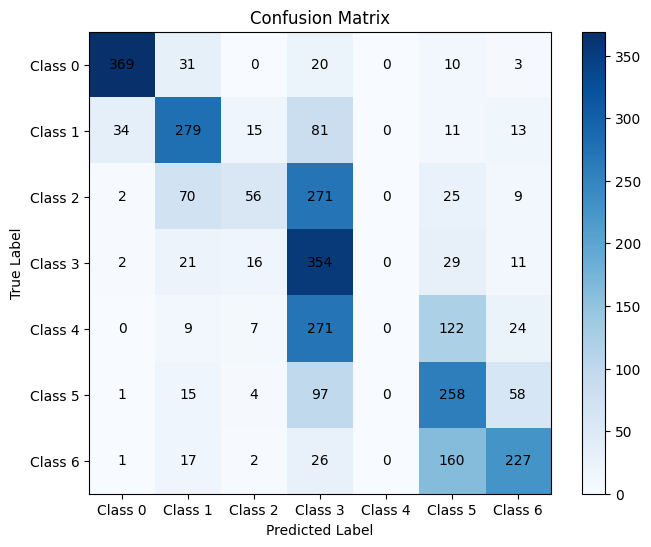

In [ ]:
# Predict classes for test images
predicted_labels = softmax_model.predict(x_test)

# Generate confusion matrix
confusion_matrix = confusion_matrix(y_test, np.argmax(predicted_labels, axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(num_classes), ['Class {}'.format(determine_group_age(i)) for i in range(num_classes)])
plt.yticks(np.arange(num_classes), ['Class {}'.format(determine_group_age(i)) for i in range(num_classes)])

# Display values on each cell
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center')

plt.show()

## ***Apply softmax with neural network***


In [ ]:
def build_softmax_nn_model(input_shape, num_classes):
    model = Sequential([
        # Flatten the input
        Flatten(input_shape=input_shape),

        # Dense layers with ReLU activation functions
        Dense(2048, activation='relu'), # img_shape * curr_layer_neurons + bias_per_each_neuron = 200*200*2048 + 2048
        Dense(1024, activation='relu'), # prev_layer_neurons + curr_layer_neurons + bias_per_each_neuron = 2048*1024 + 1024
        Dense(512, activation='relu'), # ... = 1024*512 + 512
        Dense(256, activation='relu'), # ... = 512*256 + 256
        Dense(128, activation='relu'), # ... = 256*128 + 128
        # Output layer with softmax activation
        Dense(num_classes, activation='softmax') # ... = 128*7 + 7

        # 84,710,151 params = 84,706,176 weights + 3,975 biases
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (200, 200)
num_classes = 7

softmax_nn_model = build_softmax_nn_model(input_shape, num_classes)

# Display the model summary
softmax_nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 40000)             0         
                                                                 
 dense_1 (Dense)             (None, 2048)              81922048  
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 7)                

## Train the Softmax neural network model using the training images and labels:

In [ ]:
history = softmax_nn_model.fit(x_train, y_train, epochs=100,batch_size=100, validation_data=(x_valid, y_valid))

Epoch 1/100
309/309 [==============================] - 8s 19ms/step - loss: 1.4752 - accuracy: 0.3998 - val_loss: 1.8649 - val_accuracy: 0.3856
Epoch 2/100
309/309 [==============================] - 5s 17ms/step - loss: 1.2093 - accuracy: 0.5038 - val_loss: 1.5035 - val_accuracy: 0.4500
Epoch 3/100
309/309 [==============================] - 5s 17ms/step - loss: 1.1317 - accuracy: 0.5346 - val_loss: 1.5893 - val_accuracy: 0.4550
Epoch 4/100
309/309 [==============================] - 5s 17ms/step - loss: 1.0974 - accuracy: 0.5517 - val_loss: 1.5528 - val_accuracy: 0.4633
Epoch 5/100
309/309 [==============================] - 5s 17ms/step - loss: 1.0640 - accuracy: 0.5671 - val_loss: 1.5677 - val_accuracy: 0.4682
Epoch 6/100
309/309 [==============================] - 5s 17ms/step - loss: 1.0321 - accuracy: 0.5775 - val_loss: 1.6665 - val_accuracy: 0.4509
Epoch 7/100
309/309 [==============================] - 5s 17ms/step - loss: 0.9963 - accuracy: 0.5953 - val_loss: 1.7699 - val_accuracy:

In [ ]:
test_loss, test_accuracy = softmax_nn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

95/95 [==============================] - 0s 4ms/step - loss: 3.5598 - accuracy: 0.6137
Test Accuracy: 0.6136588454246521


## ***apply CNN with Dropout***

In [ ]:
# Create a Sequential model
model = Sequential()

# Convolutional layers (wider and deeper)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1))) # (3*3*1) * 64 + 64 = 640 params
# (200, 200, 1) -> (198, 198, 64) using pedding='valid': 200-3+1 = 198 
model.add(MaxPooling2D(pool_size=(2, 2))) # 0 params
# (198, 198, 64) -> (99, 99, 64)
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # (3*3*64) * 128 + 128 = 73,856 params
# (99, 99, 64) -> (97, 97, 128) using pedding='valid': 99-3+1 = 97
model.add(MaxPooling2D(pool_size=(2, 2))) # 0 params
# (97, 97, 128) -> (48, 48, 128)

# Flatten layer
model.add(Flatten()) # (48, 48, 128) -> (48*48*128) = (294,912)

# Dense layers with dropout
model.add(Dense(256, activation='relu')) # 294,912 * 256 + 256 = 75,497,728 params
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu')) # 256 * 128 + 128 = 32,896 params
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax')) # 128 * 7 + 7 = 903 params

# 75,606,023 params = 75,605,440 weights + 583 biases

# Compile the model with learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
# model.summary()

history = model.fit(x_train, y_train, epochs=100,batch_size=100, validation_data=(x_valid, y_valid))

Epoch 1/100
309/309 [==============================] - 29s 72ms/step - loss: 1.6554 - accuracy: 0.3385 - val_loss: 1.5177 - val_accuracy: 0.4550
Epoch 2/100
309/309 [==============================] - 21s 67ms/step - loss: 1.2947 - accuracy: 0.4902 - val_loss: 1.3595 - val_accuracy: 0.5450
Epoch 3/100
309/309 [==============================] - 21s 67ms/step - loss: 1.1291 - accuracy: 0.5604 - val_loss: 1.4501 - val_accuracy: 0.5483
Epoch 4/100
309/309 [==============================] - 21s 67ms/step - loss: 1.0300 - accuracy: 0.5980 - val_loss: 1.3935 - val_accuracy: 0.5797
Epoch 5/100
309/309 [==============================] - 21s 67ms/step - loss: 0.9479 - accuracy: 0.6319 - val_loss: 1.4502 - val_accuracy: 0.5442
Epoch 6/100
309/309 [==============================] - 21s 67ms/step - loss: 0.8874 - accuracy: 0.6579 - val_loss: 1.3796 - val_accuracy: 0.5937
Epoch 7/100
309/309 [==============================] - 21s 67ms/step - loss: 0.8321 - accuracy: 0.6817 - val_loss: 1.4653 - val_ac

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

95/95 [==============================] - 1s 10ms/step - loss: 4.5514 - accuracy: 0.6740
Test Accuracy: 0.6740349531173706


## ***apply CNN with L2***

In [ ]:
# Create a Sequential model
model = Sequential()

# Convolutional layers (wider and deeper)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers with L2 regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # Wider dense layer with L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # Deeper dense layer with L2 regularization
model.add(Dense(7, activation='softmax'))

# Compile the model with learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
# model.summary()

history = model.fit(x_train, y_train, epochs=100,batch_size=100, validation_data=(x_valid, y_valid))

Epoch 1/100
309/309 [==============================] - 28s 72ms/step - loss: 3.2288 - accuracy: 0.4499 - val_loss: 2.6851 - val_accuracy: 0.4732
Epoch 2/100
309/309 [==============================] - 21s 67ms/step - loss: 2.0887 - accuracy: 0.5679 - val_loss: 2.1500 - val_accuracy: 0.5244
Epoch 3/100
309/309 [==============================] - 21s 68ms/step - loss: 1.7452 - accuracy: 0.5957 - val_loss: 1.9587 - val_accuracy: 0.5186
Epoch 4/100
309/309 [==============================] - 21s 67ms/step - loss: 1.5636 - accuracy: 0.6138 - val_loss: 2.1082 - val_accuracy: 0.4814
Epoch 5/100
309/309 [==============================] - 21s 67ms/step - loss: 1.4519 - accuracy: 0.6295 - val_loss: 1.9753 - val_accuracy: 0.5045
Epoch 6/100
309/309 [==============================] - 21s 67ms/step - loss: 1.3756 - accuracy: 0.6434 - val_loss: 1.8811 - val_accuracy: 0.5169
Epoch 7/100
309/309 [==============================] - 21s 68ms/step - loss: 1.3187 - accuracy: 0.6580 - val_loss: 1.8687 - val_ac

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

95/95 [==============================] - 1s 10ms/step - loss: 1.8234 - accuracy: 0.6651
Test Accuracy: 0.6651270389556885


## ***apply CNN without Regularization***

In [ ]:
# Create a Sequential model
model = Sequential()

# Convolutional layers (wider and deeper)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers without regularization
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
# model.summary()

history = model.fit(x_train, y_train, epochs=100,batch_size=100, validation_data=(x_valid, y_valid))

Epoch 1/100
309/309 [==============================] - 28s 71ms/step - loss: 1.2612 - accuracy: 0.4988 - val_loss: 1.6788 - val_accuracy: 0.4955
Epoch 2/100
309/309 [==============================] - 21s 66ms/step - loss: 0.8775 - accuracy: 0.6565 - val_loss: 1.3723 - val_accuracy: 0.5384
Epoch 3/100
309/309 [==============================] - 21s 67ms/step - loss: 0.7612 - accuracy: 0.7062 - val_loss: 1.4092 - val_accuracy: 0.5954
Epoch 4/100
309/309 [==============================] - 20s 66ms/step - loss: 0.6859 - accuracy: 0.7380 - val_loss: 1.4283 - val_accuracy: 0.5912
Epoch 5/100
309/309 [==============================] - 20s 66ms/step - loss: 0.6177 - accuracy: 0.7643 - val_loss: 1.4883 - val_accuracy: 0.5846
Epoch 6/100
309/309 [==============================] - 20s 66ms/step - loss: 0.5561 - accuracy: 0.7916 - val_loss: 1.5873 - val_accuracy: 0.6094
Epoch 7/100
309/309 [==============================] - 20s 66ms/step - loss: 0.4976 - accuracy: 0.8157 - val_loss: 1.2868 - val_ac

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

95/95 [==============================] - 1s 10ms/step - loss: 3.2560 - accuracy: 0.6595
Test Accuracy: 0.659518301486969


## ***apply CNN with Dropout + Batch Normaliztion + Early Stop***

In [ ]:
# Create a Sequential model
model = Sequential()

# Convolutional layers with BatchNormalization
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers with dropout and BatchNormalization
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Display the model summary
model.summary()

# Fit the model with early stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=100,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stopping])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      640       
                                                                 
 batch_normalization (Batch  (None, 198, 198, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 97, 97, 128)       512       
 chNormalization)                                                
                                                      

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

95/95 [==============================] - 4s 29ms/step - loss: 1.0838 - accuracy: 0.6707
Test Accuracy: 0.6707357168197632


95/95 [==============================] - 2s 22ms/step
Confusion matrix, without normalization


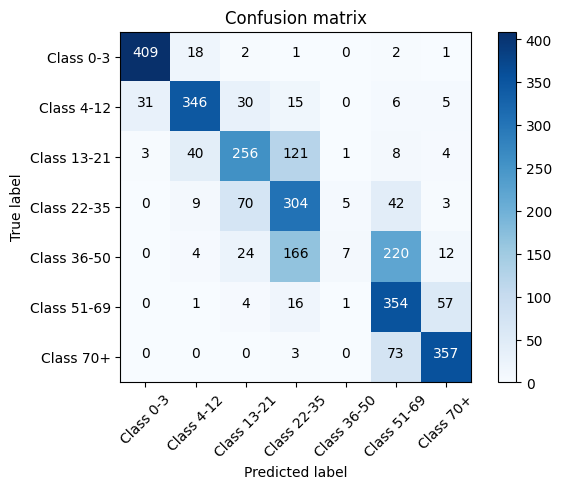

In [ ]:
# Predict classes for test images
predicted_labels = model.predict(x_test)

# Generate confusion matrix
confusion_matrix = confusion_matrix(y_test, np.argmax(predicted_labels, axis=1))

# Define class labels
class_labels = ['Class {}'.format(determine_group_age(i)) for i in range(num_classes)]

# Plot confusion matrix with labels
plot_confusion_matrix(confusion_matrix, classes=class_labels)
plt.show()

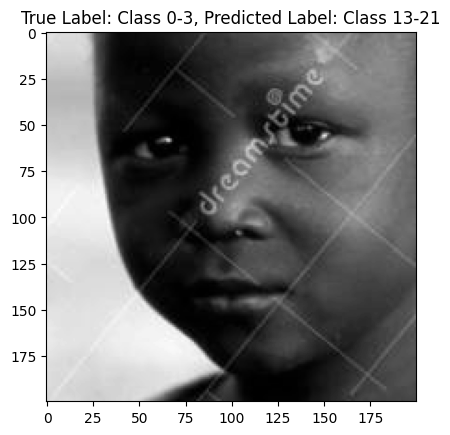

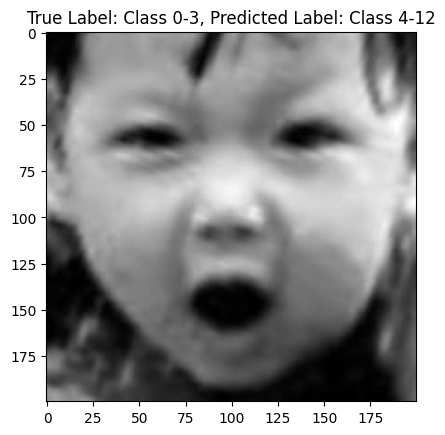

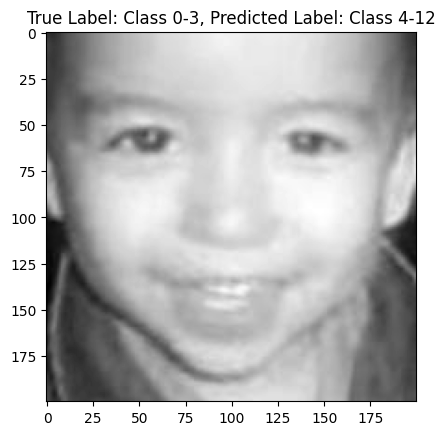

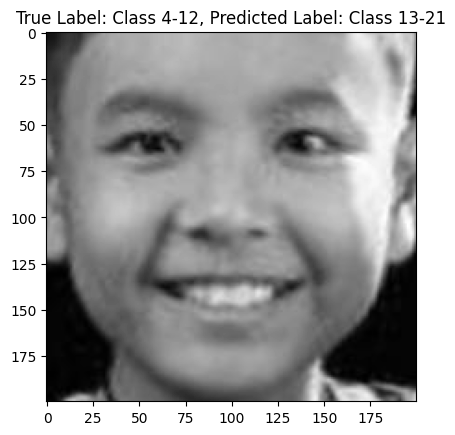

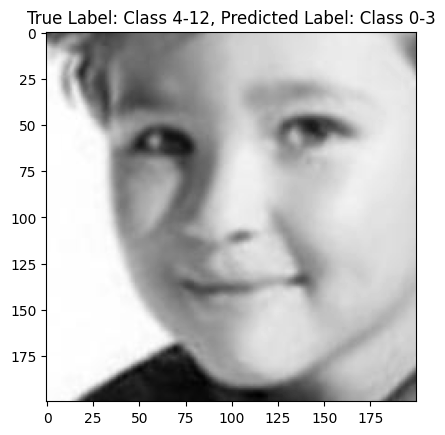

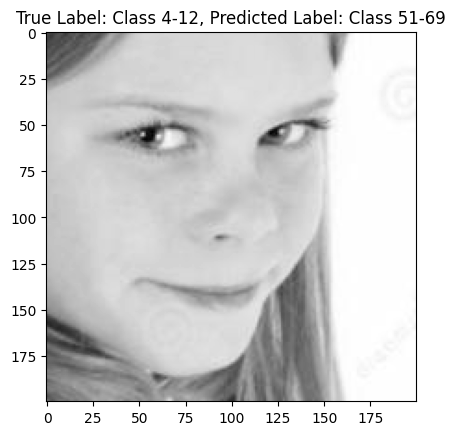

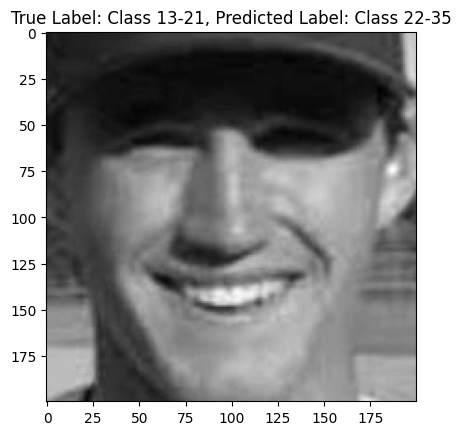

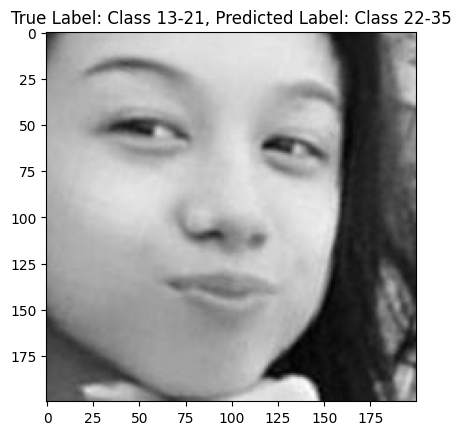

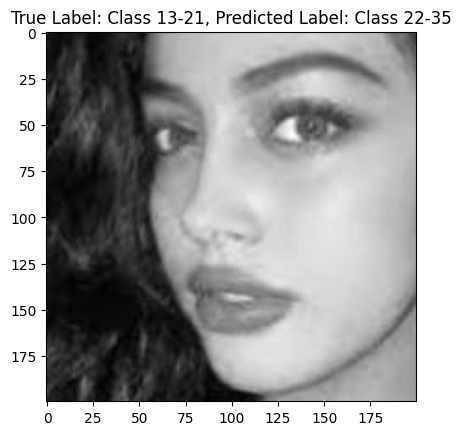

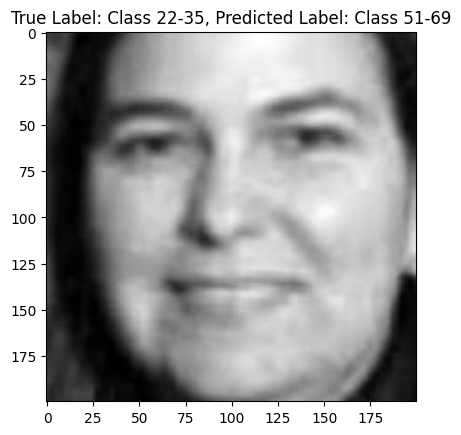

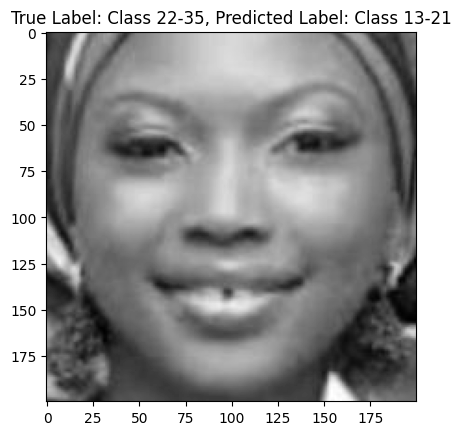

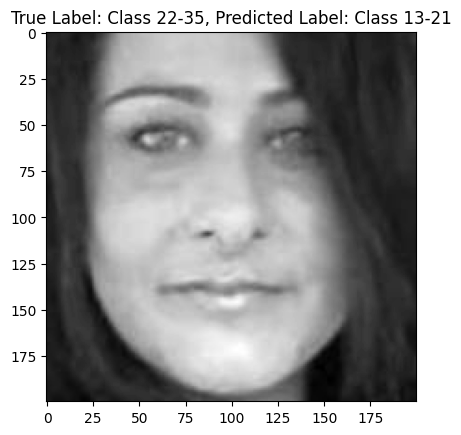

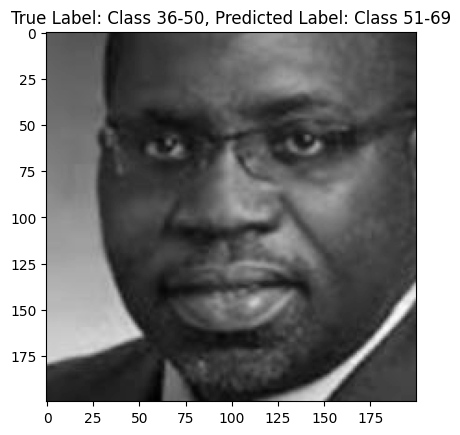

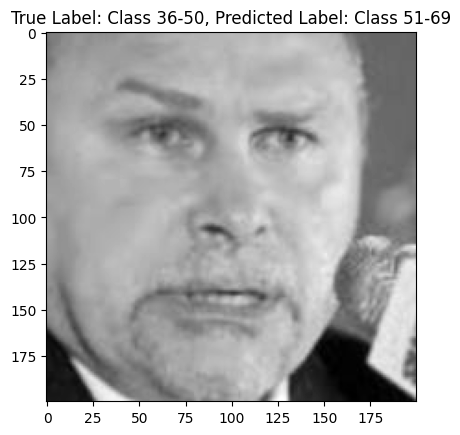

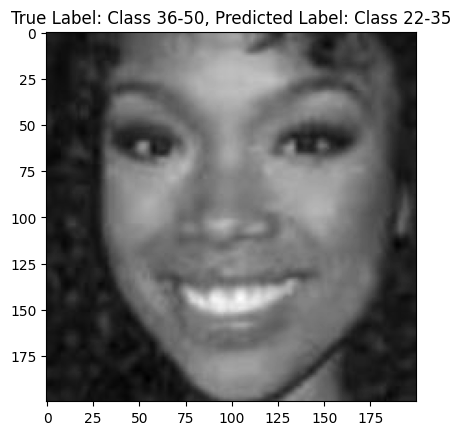

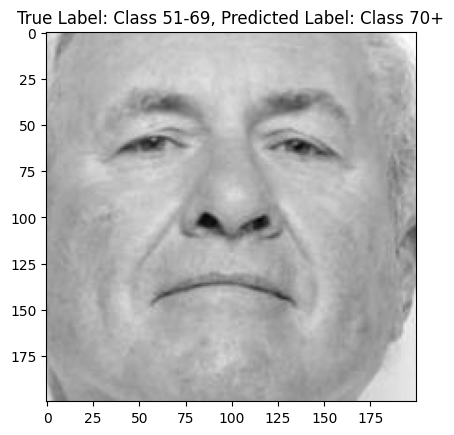

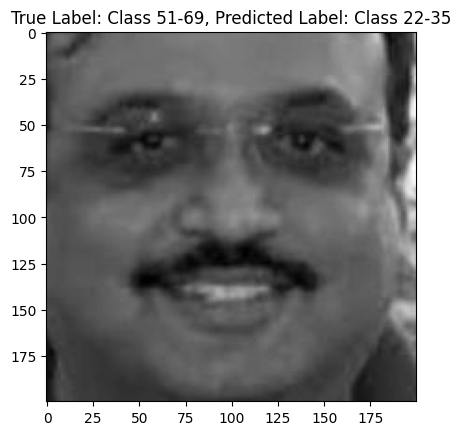

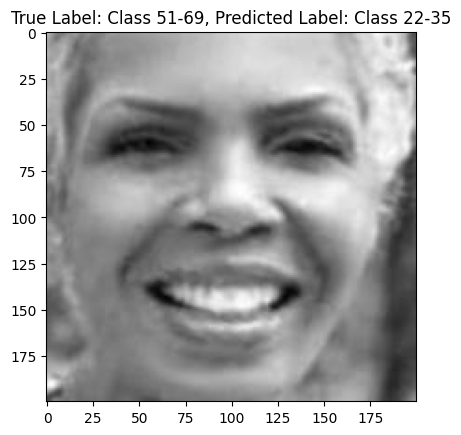

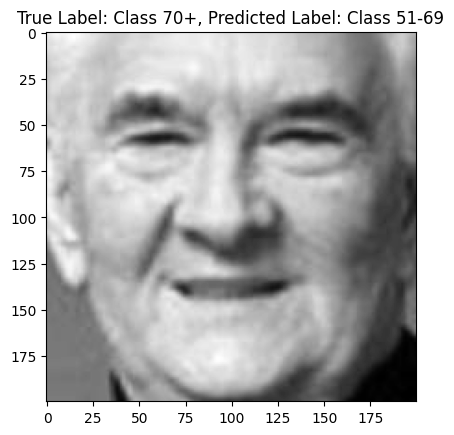

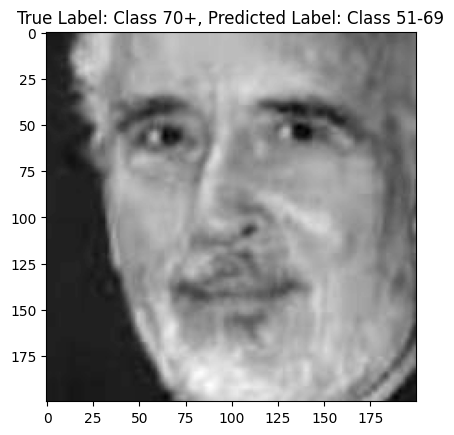

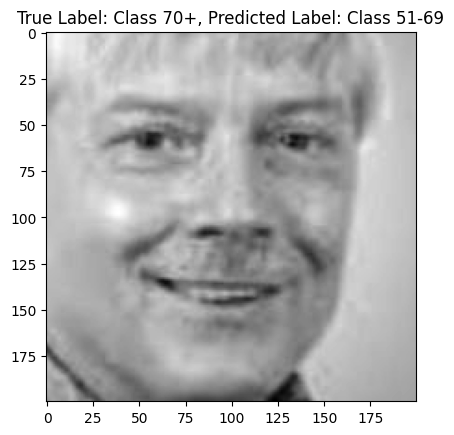

In [ ]:
# Find the indices of misclassified images for each class
misclassified_indices = {}
for i in range(num_classes):
    misclassified_indices[i] = []
    for j in range(len(y_test)):
        if y_test[j] == i and np.argmax(predicted_labels[j]) != i:
            misclassified_indices[i].append(j)

# Select a few misclassified images from each class
num_images_to_show = 3
for i in range(num_classes):
    if len(misclassified_indices[i]) > 0:
        selected_indices = random.sample(misclassified_indices[i], min(num_images_to_show, len(misclassified_indices[i])))
        for j in selected_indices:
            plt.imshow(x_test[j].reshape(200, 200), cmap='gray')
            plt.title(f"True Label: {class_labels[y_test[j]]}, Predicted Label: {class_labels[np.argmax(predicted_labels[j])]}")
            plt.show()

